In [77]:
from scipy import stats
from math import pi
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [78]:
MXvideos_original = pd.read_csv('cleaned_MXvideos.csv')
MXvideos_procesada = pd.read_csv('cleaned_MXvideos.csv')

MXvideos_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40451 non-null  object 
 1   trending_date           40451 non-null  object 
 2   title                   40451 non-null  object 
 3   channel_title           40451 non-null  object 
 4   category_id             40451 non-null  int64  
 5   publish_time            40451 non-null  object 
 6   tags                    40451 non-null  object 
 7   views                   40451 non-null  int64  
 8   likes                   40451 non-null  int64  
 9   dislikes                40451 non-null  int64  
 10  comment_count           40451 non-null  int64  
 11  thumbnail_link          40451 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video_error_or_removed  40451 non-null

In [79]:
MXvideos_procesada.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514)
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,13/11/2017 0:11,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398)
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418)
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935)
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÚSICA & ENTRETENIMIENTO,10,12/11/2017 15:17,[none],129645,506,67,239,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,FALSO,FALSO,FALSO,Un fuerte sismo ha afectado en la noche de est...,Colima,18.920381,-103.879975,POINT (-103.8799748 18.92038129)
6,c9VTD3n_IDs,17.14.11,La Resolana con el Capi | Programa 12 noviembr...,La Resolana,22,13/11/2017 2:00,"la resolana|""la resolana con el capi""|""tv azte...",75197,2277,69,164,https://i.ytimg.com/vi/c9VTD3n_IDs/default.jpg,FALSO,FALSO,FALSO,Hoy en La Resolana vamos a divertirnos con nue...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316)
7,XzULSsZYMRc,17.14.11,M6.7 Costa Rica Análisis de Terremotos en (((A...,concienciaradio,25,13/11/2017 1:18,"terremoto|""costa rica""|""nicaragua""|""alex backm...",142522,7745,659,0,https://i.ytimg.com/vi/XzULSsZYMRc/default.jpg,VERDADERO,FALSO,FALSO,"(CR NOTICIAS NOV 12, 2017) UN FUERTE TERREMOTO...",Puebla,18.900021,-98.449996,POINT (-98.44999618 18.90002077)
8,uijjYNtl_UM,17.14.11,7 Niños Famosos Que No Supieron Adaptarse a La...,Los mejores Top 10,24,12/11/2017 14:54,"los mejores top 10|""top 10 niños""|""top 10""|""to...",371110,20155,912,766,https://i.ytimg.com/vi/uijjYNtl_UM/default.jpg,FALSO,FALSO,FALSO,7 Niños Famosos Que No Supieron Adaptarse a La...,Puebla,18.900021,-98.449996,POINT (-98.44999618 18.90002077)
9,cOJ68MQm2ac,17.14.11,TOP: Los 7 libros infantiles más perturbadores...,DrossRotzank,24,12/11/2017 16:14,"libros infantiles|""Dross""|""terror""|""horror""|""m...",1111314,83582,2194,9106,https://i.ytimg.com/vi/cOJ68MQm2ac/default.jpg,FALSO,FALSO,FALSO,Actualizo 3 veces por semana. Si el video te g...,Chihuahua,26.933355,-105.666636,POINT (-105.6666358 26.93335472)


In [80]:
MX_category_id = pd.read_json('MX_category_id.json')
category = {}
for item in MX_category_id["items"]:
  category[item["id"]] = item["snippet"]["title"]

#MXvideos_procesada["category"] = MXvideos_procesada["category_id"].map(category)
MXvideos_procesada["category"] = [category.get(str(id).replace(".0", "")) for id in MXvideos_procesada["category_id"]]

In [81]:
MXvideos_procesada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40451 non-null  object 
 1   trending_date           40451 non-null  object 
 2   title                   40451 non-null  object 
 3   channel_title           40451 non-null  object 
 4   category_id             40451 non-null  int64  
 5   publish_time            40451 non-null  object 
 6   tags                    40451 non-null  object 
 7   views                   40451 non-null  int64  
 8   likes                   40451 non-null  int64  
 9   dislikes                40451 non-null  int64  
 10  comment_count           40451 non-null  int64  
 11  thumbnail_link          40451 non-null  object 
 12  comments_disabled       40451 non-null  object 
 13  ratings_disabled        40451 non-null  object 
 14  video_error_or_removed  40451 non-null

In [82]:
MXvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,FALSO,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,13/11/2017 0:11,La Voz Mexico 7,104972,271,174,...,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,FALSO,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,FALSO,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398),News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,FALSO,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418),News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,FALSO,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935),Howto & Style


In [83]:
# Cambiando la columna trending_date a tipo datetime
MXvideos_procesada['trending_date'] = pd.to_datetime(MXvideos_procesada['trending_date'], format="%y.%d.%m")

# Cambiando la columna publish_time a tipo datetime y creando la columna publish_hour
lsttime = []
lsthour = []
for i in range(len(MXvideos_procesada)):
  time, hour = MXvideos_procesada['publish_time'][i].split(" ")
  lsttime.append(time)
  lsthour.append(hour)

MXvideos_procesada['publish_hour'] = pd.to_datetime(lsthour, format="%H:%M")
MXvideos_procesada['publish_hour'] = MXvideos_procesada["publish_hour"].dt.strftime('%H:%M')
MXvideos_procesada['publish_date'] = pd.to_datetime(lsttime)

In [84]:
MXvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour,publish_date
0,SbOwzAl9ZfQ,2017-11-14,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),Entertainment,01:06,2017-11-13
1,klOV6Xh-DnI,2017-11-14,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,13/11/2017 0:11,La Voz Mexico 7,104972,271,174,...,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),People & Blogs,00:11,2017-11-13
2,6L2ZF7Qzsbk,2017-11-14,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398),News & Politics,12:00,2017-11-13
3,hcY52MFWMDM,2017-11-14,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418),News & Politics,22:47,2017-12-11
4,_OXDcGPVAa4,2017-11-14,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935),Howto & Style,14:17,2017-11-13


In [85]:
def verificar_NaN(MXvideos_procesada):
  cont = 0
  for columna in MXvideos_procesada.columns:
    a = MXvideos_procesada[columna].isna()
    if sum(a) != 0:
      print(f"En la columna {columna} se han encontrado {sum(a)} valores NaN")
    else:
      cont += 1

  if cont == len(MXvideos_procesada.columns):
    print("No se han encontrado columnas con valores NaN")

def Nuevo_Valor(columna,df):
  b = randint(0,len(df)-1)
  while (df[columna].get(b) == np.nan or df[columna].get(b) == '[none]'):
    b = randint(0,len(df)-1)
  return df[columna].get(b)

def Modificar_valores_NaN(columna,df):
  df[columna].fillna(value= Nuevo_Valor(columna,df),inplace = True)  
  return df[columna]

def Verificar_None(MXvideos_procesada):
  cont0 = 0
  for columna in MXvideos_procesada.columns:
    cont = 0
    for i in range(len(MXvideos_procesada)):
      if MXvideos_procesada[columna].get(i) == '[none]':
        cont += 1
    if cont != 0:
      print(f"En la columna {columna} se han encontrado {cont} valores None")
    else:
      cont0 += 1
  
  if cont0 == len(MXvideos_procesada.columns):
    print("No se han encontrado columnas con valores None")

def Remplazar_None(columna,df):
  for i in range(len(df[columna])):
      if df[columna].get(i) == '[none]':
        df.at[i, columna] = Nuevo_Valor(columna,df)
  return df[columna]

In [86]:
#en esta parte eliminamos todas las filas que contengan valores NaN en la columna Video_id
MXvideos_procesada.dropna(axis=1)

#en esta parte verificamos que la columna Video_id ya no tenga valores NaN y cuales aun tienen
verificar_NaN(MXvideos_procesada)
print()

#Sabiendo que columnnas contienen los valores NaN procedemos a remplazarlos con la funcion Modificar_valores_NaN 
#que remplaza cada valor con otro aleatorio de la columna siempre y cuando no sea otro NaN
MXvideos_procesada['category'] = Modificar_valores_NaN('category',MXvideos_procesada)
MXvideos_procesada['description'] = Modificar_valores_NaN('description',MXvideos_procesada)
verificar_NaN(MXvideos_procesada)
print()

#Ya que los [none] no se consideran valores NaN utilizaremos replace para remplazarlo con otro de los valores en la lista
Verificar_None(MXvideos_procesada)
MXvideos_procesada['tags'] = Remplazar_None('tags', MXvideos_procesada)
Verificar_None(MXvideos_procesada)

En la columna description se han encontrado 4224 valores NaN
En la columna category se han encontrado 252 valores NaN

No se han encontrado columnas con valores NaN

En la columna tags se han encontrado 7685 valores None
No se han encontrado columnas con valores None


In [87]:
MXvideos_procesada.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour,publish_date
0,SbOwzAl9ZfQ,2017-11-14,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,13/11/2017 1:06,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,FALSO,FALSO,Disfruta la presencia del Chef Torreblanca en ...,Tlaxcala,19.319995,-98.230010,POINT (-98.2300096 19.31999514),Entertainment,01:06,2017-11-13
1,klOV6Xh-DnI,2017-11-14,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,13/11/2017 0:11,La Voz Mexico 7,104972,271,174,...,FALSO,FALSO,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Michoacan,19.679973,-100.569996,POINT (-100.569996 19.67997316),People & Blogs,00:11,2017-11-13
2,6L2ZF7Qzsbk,2017-11-14,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,13/11/2017 12:00,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,FALSO,FALSO,La canción del principio se llama “Este espíri...,Guerrero,17.549974,-99.500010,POINT (-99.5000096 17.54997398),News & Politics,12:00,2017-11-13
3,hcY52MFWMDM,2017-11-14,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,12/11/2017 22:47,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,FALSO,FALSO,El video es de un Walmart en el pais centroame...,Hidalgo,20.170434,-98.730031,POINT (-98.73003076000001 20.17043418),News & Politics,22:47,2017-12-11
4,_OXDcGPVAa4,2017-11-14,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,13/11/2017 14:17,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,FALSO,FALSO,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Jalisco,19.770019,-104.369997,POINT (-104.3699966 19.77001935),Howto & Style,14:17,2017-11-13


In [88]:
def fix_outliers(df,columna):
  #calculamos los quantiles por arribadel 5% y por debajo del 95%
  media = (df[columna]).mean()
  mediana = (df[columna]).median()
  deciles = np.arange(1,20) *5
  deciles_dist = [np.percentile(df[columna], dec) for dec in deciles]
  for i in range(len(df[columna])):
    if (df[columna].get(i) <deciles_dist[0]):
      df.at[i,columna] = round(media)
    if (df[columna].get(i) >deciles_dist[len(deciles_dist) - 1]):
       df.at[i,columna] = round(mediana)
  return df[columna]

In [89]:
MXvideos_procesada['likes'] = fix_outliers(MXvideos_procesada,'likes')
MXvideos_procesada['dislikes'] = fix_outliers(MXvideos_procesada,'dislikes')
MXvideos_procesada['views'] = fix_outliers(MXvideos_procesada,'views')

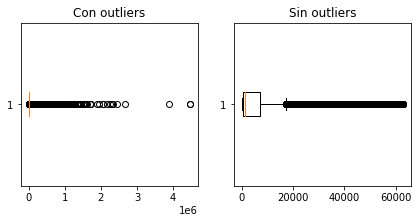

In [90]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(MXvideos_original["likes"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(MXvideos_procesada["likes"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

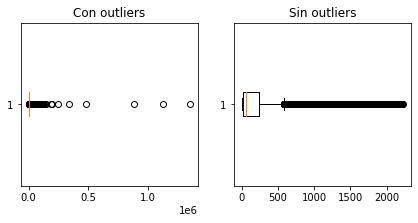

In [91]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(MXvideos_original["dislikes"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(MXvideos_procesada["dislikes"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

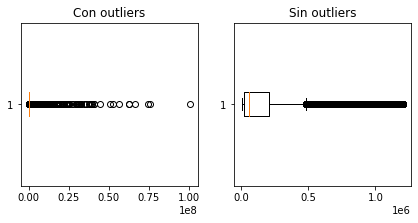

In [92]:
plt.subplots(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.boxplot(MXvideos_original["views"], vert=False)
plt.title("Con outliers")
plt.axis("on")
plt.subplot(1, 2, 2)
plt.boxplot(MXvideos_procesada["views"], vert=False)
plt.title("Sin outliers")
plt.axis("on")
plt.show()

In [93]:
MXvideos_procesada.to_csv('MXvideos_cc50_procesada.csv')